# Rapid proteomic analysis for solid tumors reveals LSD1 as a drug target in an end‐stage cancer patient
#### Doll et al. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6068348/

### Abstract
Recent advances in mass spectrometry (MS)‐based technologies are now set to transform translational cancer proteomics from an idea to a practice. Here, we present a robust proteomic workflow for the analysis of clinically relevant human cancer tissues that allows quantitation of thousands of tumor proteins in several hours of measuring time and a total turnaround of a few days. We applied it to a chemorefractory metastatic case of the extremely rare urachal carcinoma. Quantitative comparison of lung metastases and surrounding tissue revealed several significantly upregulated proteins, among them lysine‐specific histone demethylase 1 (LSD1/KDM1A). LSD1 is an epigenetic regulator and the target of active development efforts in oncology. Thus, clinical cancer proteomics can rapidly and efficiently identify actionable therapeutic options. While currently described for a single case study, we envision that it can be applied broadly to other patients in a similar condition.

### Workflow

![Figure 2](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6068348/bin/MOL2-12-1296-g002.jpg)

**Figure 2** Proteomics workflow for the case study. (A) Timeline of the project. (B) Experimental design, including source of material, inStageTip sample preparation, and depiction of the analytical workflow


### Results

![Figure 3](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6068348/bin/MOL2-12-1296-g003.jpg)

**Figure 3** Proteins differentially expressed in the urachal carcinoma lung metastases. (A) Volcano plot of the p‐values (y‐axis) vs. the log2 protein abundance differences (x‐axis) between metastases and control, with lines of significance colored in black or gray lines corresponding to a 5% or 1% FDR, respectively. (B) Mechanisms of action of LSD1/KDM1A and inhibitory drug treatment proposed: **JATROSOME. TRANYLCYPROMIN**


### Workflow with the Clinical Knowledge Graph

1. Generate Analysis Report: Proteomics data
2. Identify Candidate Drug Treatments
3. Rank Candidates According to Toxicity

![Clinical_Knowledge_Graph](banner.jpg)

## Generate Analysis Report: Proteomics Data

### Report Manager

In [81]:
from report_manager import project

from plotly.offline import init_notebook_mode, iplot
%matplotlib inline
init_notebook_mode(connected=True)

##### We load specific configuration for this project.

In [2]:
configuration_files = {"proteomics":"/Users/albertosantos/Development/Clinical_Proteomics_Department/ClinicalKnowledgeGraph(CKG)/code/src/report_manager/config/proteomics_CS.yml"}

##### We create a new project object that we can use to run the analyses

In [3]:
study_case_project = project.Project(identifier="P0000002", configuration_files=configuration_files, datasets={}, knowledge=None, report={})

##### We need to first build the project. This step will collect the project datasets from CKG and process them

In [4]:
study_case_project.build_project(force=False)

##### We can now generate the report following the specified configuration

In [5]:
study_case_project.generate_report()

##### We can access the project report

In [6]:
study_case_project.show_report(environment='notebook')

defaultdict(list,
            {'PROJECT INFORMATION': [],
             'PROTEOMICS': [],
             'MULTIOMICS': [],
             'KNOWLEDGE GRAPH': []})

##### Ready! All the analyses are done and we can now access to all the results for each data type

In [7]:
study_case_project.list_datasets()

dict_keys(['multiomics', 'proteomics'])

##### We will use the results from the proteomics analyses. We access the dataset 'proteomics' for further analysis.

In [8]:
proteomics_dataset = study_case_project.get_dataset(dataset='proteomics')

##### The available analysis for this dataset are:

In [9]:
proteomics_dataset.list_dataframes()

['go annotation',
 'number of modified proteins',
 'number of peptides',
 'number of proteins',
 'original',
 'pathway annotation',
 'processed',
 'protein biomarkers',
 'regulated',
 'regulation table',
 'tissue qcmarkers']

###### In this case, we use the regulation table to extract proteins upregulated in the metastatic tissue compare to non-cancerous tissue.

In [10]:
regulation_table = proteomics_dataset.get_dataframe(dataset_name='regulation table')

In [11]:
regulation_table.head()

identifier  group1   group2  mean(group1)  std(group1)  mean(group2)  \
0  A1BG~P04217  CANCER  CONTROL        31.710        0.047        32.063   
1  A1CF~Q9NQ94  CANCER  CONTROL        26.563        0.360        24.711   
2   A2M~P01023  CANCER  CONTROL        34.287        0.033        35.233   
3  AAAS~Q9NRG9  CANCER  CONTROL        26.317        0.173        24.831   
4  AACS~Q86V21  CANCER  CONTROL        26.350        0.625        27.187   

   std(group2)  effsize  log2FC        FC  ... dfk  dfn  T-statistics  \
0        0.384   -0.738  -0.353 -1.277214  ...   1    2      0.153337   
1        0.366    2.913   1.852  3.610003  ...   1    2     -0.924233   
2        0.026  -18.081  -0.946 -1.926524  ...   1    2      0.463202   
3        0.532    2.145   1.486  2.801113  ...   1    2     -0.594485   
4        1.211   -0.496  -0.837 -1.786332  ...   1    2      0.346611   

     pvalue      padj  rejected  -log10 pvalue                  correction  \
0  0.325527  0.714951     False       0.487413  permutation FDR (4.0 perm)   
1  0.036402  0.052925     False       1.438878  permutation FDR (4.0 perm)   
2  0.000997  0.271411     False       3.001177  permutation FDR (4.0 perm)   
3  0.064230  0.149537     False       1.192262  permutation FDR (4.0 perm)   
4  0.476862  0.423692     False       0.321607  permutation FDR (4.0 perm)   

                  Method s0  
0  SAMR Two class paired  2  
1  SAMR Two class paired  2  
2  SAMR Two class paired  2  
3  SAMR Two class paired  2  
4  SAMR Two class paired  2  

[5 rows x 21 columns]

In [12]:
regulation_table[regulation_table['identifier']=='HDAC1~Q13547']

identifier  group1   group2  mean(group1)  std(group1)  mean(group2)  \
1885  HDAC1~Q13547  CANCER  CONTROL        30.666        0.301        27.292   

      std(group2)  effsize  log2FC         FC  ... dfk  dfn  T-statistics  \
1885        2.201    1.227   3.374  10.367528  ...   1    2     -1.008813   

        pvalue      padj  rejected  -log10 pvalue                  correction  \
1885  0.164871  0.036735      True       0.782856  permutation FDR (4.0 perm)   

                     Method s0  
1885  SAMR Two class paired  2  

[1 rows x 21 columns]

##### As in the article, we use significantly regulated proteins with a fold change higher than two.

In [13]:
up_regulated_proteins = regulation_table.loc[(regulation_table.rejected) & (regulation_table.FC > 2), ['identifier']]

In [14]:
up_regulated_proteins.shape

(199, 1)

In [15]:
'HDAC1~Q13547' in up_regulated_proteins['identifier'].tolist()

True

### Graph Database Connector

In [16]:
from graphdb_connector import query_utils, connector

##### We connect to CKG database using the default configuration

In [17]:
driver = connector.getGraphDatabaseConnectionConfiguration()

##### We load the existing database queries that we can use to extract knowledge from CKG

In [18]:
queries = query_utils.read_knowledge_queries()

### 1) Filter for Regulated Proteins Associated to Lung Cancer:

##### We want to check whether we can identify known connection between the upregulated proteins in metastases and the disease
##### We check if there are queries for these node types: Protein, Disease

In [19]:
selected_queries = query_utils.find_queries_involving_nodes(queries=queries, nodes=["Protein", "Disease"], print_pretty=True)

In [20]:
selected_queries.head()

Name  \
id                                                                             
Disease                    associated diseases in at least two of the pro...   
association_disease_score                                   specific disease   

                                                                 Description  \
id                                                                             
Disease                    get relationships to diseases from a list of p...   
association_disease_score  Return the list of proteins associated to a sp...   

                            involved_nodes    involved_rels  \
id                                                            
Disease                    Protein,Disease  ASSOCIATED_WITH   
association_disease_score  Protein,Disease  ASSOCIATED_WITH   

                                                                       query  \
id                                                                             
Disease                    MATCH (project:Project)-[:STUDIES_DISEASE]-(d:...   
association_disease_score  MATCH (protein:Protein)-[r]-(disease:Disease) ...   

                                                                     example  
id                                                                            
Disease                                                                       
association_disease_score  proteins = ['A1BG~P04217','A2M~P01023','ACACB~...

##### The query named 'specific disease' can help us in this case

In [21]:
disease_query = selected_queries.loc["association_disease_score", "query"]
proteins = ['"{}"'.format(p) for p in up_regulated_proteins["identifier"].tolist()]
diseases = ['DOID:1324']
diseases = ['"{}"'.format(d) for d in diseases]
disease_query = disease_query.format(",".join(proteins),",".join(diseases), 1)

In [22]:
proteins_associated_lung_cancer = connector.getCursorData(driver=driver, query=disease_query, parameters={})

In [23]:
proteins_associated_lung_cancer.head()

node1        node2  weight             type    source
0      CPQ~Q9Y646  lung cancer   1.034  ASSOCIATED_WITH  DISEASES
1  CEACAM6~P40199  lung cancer   1.350  ASSOCIATED_WITH  DISEASES
2     AGR2~O95994  lung cancer   1.133  ASSOCIATED_WITH  DISEASES
3    THBS1~P07996  lung cancer   1.263  ASSOCIATED_WITH  DISEASES
4    KDM1A~O60341  lung cancer   1.346  ASSOCIATED_WITH  DISEASES

In [24]:
proteins_associated_lung_cancer.shape

(20, 5)

### 2) Identify Inhibitory Drugs for those Proteins

##### We use again the functionality 'find_queries_involving_nodes' to find queries involving nodes: Protein, Drug

In [25]:
selected_queries = query_utils.find_queries_involving_nodes(queries=queries, nodes=["Protein", "Drug"], print_pretty=True)

In [26]:
selected_queries.head()

Name  \
id                                                                                          
Drug                                    associated drugs in at least two of the protei...   
association_drug_intervention_proteins             drug intervention- protein association   
association_drug_interaction_score                           drug interaction association   

                                                                              Description  \
id                                                                                          
Drug                                    get relationships to drugs. Limit the result t...   
association_drug_intervention_proteins  Return associations between a list of proteins...   
association_drug_interaction_score      Return the list of drugs associated to the lis...   

                                                                involved_nodes  \
id                                                                               
Drug                                                              Protein,Drug   
association_drug_intervention_proteins  Project,Protein,Clinical_variable,Drug   
association_drug_interaction_score                                Protein,Drug   

                                                   involved_rels  \
id                                                                 
Drug                                                     ACTS_ON   
association_drug_intervention_proteins  HAD_INTERVENTION,ACTS_ON   
association_drug_interaction_score                       ACTS_ON   

                                                                                    query  \
id                                                                                          
Drug                                    MATCH (protein:Protein)-[r:ACTS_ON]-(drug:Drug...   
association_drug_intervention_proteins  MATCH (project:Project)-[]-()-[:HAD_INTERVENTI...   
association_drug_interaction_score      MATCH (protein:Protein)-[r]-(drug:Drug) WHERE ...   

                                                                                  example  
id                                                                                         
Drug                                                                                       
association_drug_intervention_proteins  project_id = 'P0000002'\nproteins = ['A1BG~P04...  
association_drug_interaction_score      proteins = ['A1BG~P04217','A2M~P01023','ACACB~...

In [27]:
proteins = ['"{}"'.format(p) for p in proteins_associated_lung_cancer['node1'].tolist()]
drug_query = selected_queries.loc["association_drug_interaction_score", "query"].format(",".join(proteins), 'inhibition', 0.8)

##### We search in CKG database for known inhibitory drugs for these proteins

In [28]:
drugs_proposed = connector.getCursorData(driver=driver, query=drug_query, parameters={})

In [29]:
drugs_proposed.head()

node1               node2  drug_id  \
0  CDH1~P12830            Ketamine  DB01221   
1  CDH1~P12830        Dinoprostone  DB00917   
2  CDH1~P12830         Cholic Acid  DB02659   
3  CDH1~P12830           Sorafenib  DB00398   
4  CDH1~P12830  Diethylstilbestrol  DB00255   

                                           Drug_desc  weight     type  \
0  Ketamine is an NMDA receptor antagonist with a...   0.800  ACTS_ON   
1  Dinoprostone is a naturally occurring prostagl...   0.800  ACTS_ON   
2  A major primary bile acid produced in the live...   0.957  ACTS_ON   
3  Sorafenib (rINN), marketed as Nexavar by Bayer...   0.800  ACTS_ON   
4  A synthetic nonsteroidal estrogen used in the ...   0.800  ACTS_ON   

       action  source  
0  inhibition  STITCH  
1  inhibition  STITCH  
2  inhibition  STITCH  
3  inhibition  STITCH  
4  inhibition  STITCH

In [30]:
drugs_proposed.shape

(36, 8)

##### These list of inhibitory drugs could in principle be used to identify alternative treatments
#### We can already see that CKG found the same inhibitory drug that was identified in the study case published. However, many other options are proposed and could be further ranked using other criteria.

In [31]:
from analytics_core import utils
from analytics_core.viz import viz

In [32]:
net = viz.get_network(data=drugs_proposed, identifier="inhibition_drugs", args={"source":"node1", "target":"node2", "values":"weight", "node_size":"degree","title":"Proposed drugs", "color_weight":False})

In [33]:
viz.visualize_notebook_network(net["notebook"], notebook_type='jupyter', layout={'width':'100%', 'height':'700px'})

Cytoscape(data={'elements': [{'data': {'degree': 7, 'betweenness': 0.021212121212121213, 'eigenvector': '0.000…

In [34]:
utils.json_network_to_gml(net['net_json'], path='drug_network.gml')

##### One possible step to reduce the list would be to use a more stringent cutoff when choosing inhibitory drugs. For instance, a cutoff of 0.9 would provide a candidate list with higher confidence.

In [35]:
proteins = ['"{}"'.format(p) for p in proteins_associated_lung_cancer['node1'].tolist()]
drug_query = queries["association_drug_interaction_score"]["query"].format(",".join(proteins), 'inhibition', 0.9)

##### We search again in CKG database for known inhibitory drugs for these proteins

In [36]:
drugs_proposed = connector.getCursorData(driver=driver, query=drug_query, parameters={})

In [37]:
drugs_proposed.head()

node1                                              node2  drug_id  \
0   CDH1~P12830                                        Cholic Acid  DB02659   
1   CDH1~P12830                                         Paclitaxel  DB01229   
2  CDH17~Q12864                                         Calcitriol  DB00136   
3  HDAC1~Q13547                                         Vorinostat  DB02546   
4  HDAC1~Q13547  7-[4-(Dimethylamino)Phenyl]-N-Hydroxy-4,6-Dime...  DB04297   

                                           Drug_desc  weight     type  \
0  A major primary bile acid produced in the live...   0.957  ACTS_ON   
1  Paclitaxel is a mitotic inhibitor used in canc...   0.957  ACTS_ON   
2  Calcitriol or 1,25-dihydroxycholecalciferol (a...   0.957  ACTS_ON   
3  Vorinostat (rINN) or suberoylanilide hydroxami...   0.987  ACTS_ON   
4                                               None   0.938  ACTS_ON   

       action  source  
0  inhibition  STITCH  
1  inhibition  STITCH  
2  inhibition  STITCH  
3  inhibition  STITCH  
4  inhibition  STITCH

In [38]:
drugs_proposed.shape

(9, 8)

##### The list is now shorter but contain only high confidence results

In [39]:
net = viz.get_network(data=drugs_proposed, identifier="inhibition_drugs", args={"source":"node1", "target":"node2", "values":"weight", "node_size":"degree","title":"Proposed drugs", "color_weight":False})

In [40]:
viz.visualize_notebook_network(net["notebook"], notebook_type='jupyter', layout={'width':'100%', 'height':'700px'})

Cytoscape(data={'elements': [{'data': {'degree': 2, 'betweenness': 0.009523809523809525, 'eigenvector': '0.588…

In [41]:
utils.json_network_to_gml(net['net_json'], path='drug_network_reduced.gml')

### 3) Identify Proposed Drug's Known Side Effects

##### In the case study, toxicity was in part the reason why the treatment regimens did not work. We could use the list of side effects to prioritize these drugs.

##### Let's find database queries to obtain these associations: Phenotype (side effect), Drug.

In [42]:
selected_queries = query_utils.find_queries_involving_nodes(queries=queries, nodes=["Phenotype", "Drug"], print_pretty=True)

In [43]:
selected_queries.head()

Name  \
id                                                           
association_drug_sideeffects  drug side effect association   

                                                                  Description  \
id                                                                              
association_drug_sideeffects  Return the list of side effects linked to drugs   

                              involved_nodes    involved_rels  \
id                                                              
association_drug_sideeffects  Phenotype,Drug  ASSOCIATED_WITH   

                                                                          query  \
id                                                                                
association_drug_sideeffects  MATCH (sideeffect:Phenotype)-[r]-(drug:Drug) W...   

                                                                        example  
id                                                                               
association_drug_sideeffects  drugs = ['DB00439', 'DB06196']\ndrug_side_effe...

In [44]:
drugs = drugs_proposed["drug_id"].unique()
drugs = ['"{}"'.format(d) for d in drugs]
sideeffects_query = selected_queries.loc["association_drug_sideeffects", "query"].format(",".join(drugs))

In [45]:
side_effects = connector.getCursorData(driver=driver, query=sideeffects_query, parameters={})

In [46]:
side_effects.head()

node1                      node2             type source
0  Vorinostat  Elevated serum creatinine  HAS_SIDE_EFFECT  SIDER
1  Vorinostat                 Xerostomia  HAS_SIDE_EFFECT  SIDER
2  Vorinostat                   Diarrhea  HAS_SIDE_EFFECT  SIDER
3  Vorinostat                      Cough  HAS_SIDE_EFFECT  SIDER
4  Vorinostat          Alopecia of scalp  HAS_SIDE_EFFECT  SIDER

In [47]:
side_effects.groupby('node1')['node2'].count()

node1
Atorvastatin    152
Bumetanide       40
Calcitriol       59
Cholic Acid       7
Paclitaxel      218
Vorinostat       42
Name: node2, dtype: int64

In [48]:
net = viz.get_network(data=side_effects, identifier="side_effects", args={"source":"node1", "target":"node2", "node_size":"degree","title":"Proposed drugs", "color_weight":False})

In [49]:
side_effects

node1                      node2              type source  width
0    Vorinostat  Elevated serum creatinine   HAS_SIDE_EFFECT  SIDER      1
1    Vorinostat                 Xerostomia   HAS_SIDE_EFFECT  SIDER      1
2    Vorinostat                   Diarrhea   HAS_SIDE_EFFECT  SIDER      1
3    Vorinostat                      Cough   HAS_SIDE_EFFECT  SIDER      1
4    Vorinostat          Alopecia of scalp   HAS_SIDE_EFFECT  SIDER      1
..          ...                        ...               ...    ...    ...
513  Paclitaxel            Kaposis sarcoma  IS_INDICATED_FOR  SIDER      1
514  Paclitaxel                Hypotension  IS_INDICATED_FOR  SIDER      1
515  Paclitaxel                  Carcinoma  IS_INDICATED_FOR  SIDER      1
516  Paclitaxel           Burkitt lymphoma  IS_INDICATED_FOR  SIDER      1
517  Paclitaxel                      Falls  IS_INDICATED_FOR  SIDER      1

[518 rows x 5 columns]

In [50]:
utils.json_network_to_gml(net['net_json'], path='side_effects.gml')

In [51]:
no_registerd_side_effects = list(set(drugs_proposed['node2'].tolist()).difference(side_effects['node1'].tolist()))

In [52]:
no_registerd_side_effects

['Resveratrol',
 'dATP',
 '7-[4-(Dimethylamino)Phenyl]-N-Hydroxy-4,6-Dimethyl-7-Oxo-2,4-Heptadienamide']

### 4) Reduce Adverse Response

##### The treatment regimens are also available in CKG and their side effects can be used to rank the proposed drugs. We can prioritize drugs with side effects dissimilar to the ones that caused an adverse reaction in the patient.

##### We will in this case define a new query to obtain the treatment intervention

In [53]:
treatment_intervention_query ='MATCH (project:Project)-[:HAS_ENROLLED]-(subject:Subject)-[r:HAD_INTERVENTION]-(treatment:Clinical_variable) WHERE project.id="P0000002" AND r.type="drug treatment" RETURN treatment.name AS treatment'

In [54]:
treatment_regimens = connector.getCursorData(driver=driver, query=treatment_intervention_query, parameters={})

In [55]:
treatment_regimens

treatment
0  Capecitabine
1  Folinic acid
2  Fluorouracil
3   Oxaliplatin

##### We have defined a default query that can be used to calculate Jaccard similarity between two lists of drug treatments. In this case, we can use this query to obtain similarities between side effects from the treatment regimen and the proposed alternative drugs.

In [56]:
selected_queries = query_utils.find_queries_involving_nodes(queries=queries, nodes=["Clinical_variable", "Drug"], print_pretty=True)

In [57]:
selected_queries.head()

Name  \
id                                                                                           
association_drug_intervention_proteins              drug intervention- protein association   
side_effects_jaccard_similarity_intervention_pr...         similarity between side effects   

                                                                                          Description  \
id                                                                                                      
association_drug_intervention_proteins              Return associations between a list of proteins...   
side_effects_jaccard_similarity_intervention_pr...  Return the jaccard similarity between drugs us...   

                                                                            involved_nodes  \
id                                                                                           
association_drug_intervention_proteins              Project,Protein,Clinical_variable,Drug   
side_effects_jaccard_similarity_intervention_pr...                  Drug,Clinical_variable   

                                                               involved_rels  \
id                                                                             
association_drug_intervention_proteins              HAD_INTERVENTION,ACTS_ON   
side_effects_jaccard_similarity_intervention_pr...           HAS_SIDE_EFFECT   

                                                                                                query  \
id                                                                                                      
association_drug_intervention_proteins              MATCH (project:Project)-[]-()-[:HAD_INTERVENTI...   
side_effects_jaccard_similarity_intervention_pr...  MATCH (d1:Drug)-[:HAS_SIDE_EFFECT]->(phenotype...   

                                                                                              example  
id                                                                                                     
association_drug_intervention_proteins              project_id = 'P0000002'\nproteins = ['A1BG~P04...  
side_effects_jaccard_similarity_intervention_pr...  intervention = ['Capecitabine', 'Fluorouracil'...

In [58]:
drugs_proposed

node1                                              node2  drug_id  \
0     CDH1~P12830                                        Cholic Acid  DB02659   
1     CDH1~P12830                                         Paclitaxel  DB01229   
2    CDH17~Q12864                                         Calcitriol  DB00136   
3    HDAC1~Q13547                                         Vorinostat  DB02546   
4    HDAC1~Q13547  7-[4-(Dimethylamino)Phenyl]-N-Hydroxy-4,6-Dime...  DB04297   
5    PTGES~O14684                                        Resveratrol  DB02709   
6  SLC12A2~P55011                                         Bumetanide  DB00887   
7      TXN~P10599                                               dATP  DB03222   
8    THBS1~P07996                                       Atorvastatin  DB01076   

                                           Drug_desc  weight     type  \
0  A major primary bile acid produced in the live...   0.957  ACTS_ON   
1  Paclitaxel is a mitotic inhibitor used in canc...   0.957  ACTS_ON   
2  Calcitriol or 1,25-dihydroxycholecalciferol (a...   0.957  ACTS_ON   
3  Vorinostat (rINN) or suberoylanilide hydroxami...   0.987  ACTS_ON   
4                                               None   0.938  ACTS_ON   
5  Resveratrol (3,5,4'-trihydroxystilbene) is a p...   0.957  ACTS_ON   
6                     A sulfamyl diuretic. [PubChem]   0.991  ACTS_ON   
7                                               None   0.900  ACTS_ON   
8  Atorvastatin (Lipitor) is a member of the drug...   0.957  ACTS_ON   

       action  source  
0  inhibition  STITCH  
1  inhibition  STITCH  
2  inhibition  STITCH  
3  inhibition  STITCH  
4  inhibition  STITCH  
5  inhibition  STITCH  
6  inhibition  STITCH  
7  inhibition  STITCH  
8  inhibition  STITCH

In [59]:
treatment_list = ['"{}"'.format(t) for t in treatment_regimens['treatment'].tolist()]
proposed_list = ['"{}"'.format(t) for t in drugs_proposed["drug_id"].unique()]
q = selected_queries.loc['side_effects_jaccard_similarity_intervention_proposed_drugs', 'query'].replace("INTERVENTION",",".join(treatment_list)).replace("DRUG",",".join(proposed_list))
similarity = connector.getCursorData(driver=driver, query=q, parameters={})

In [60]:
similarity = similarity[(similarity['from'].isin(treatment_regimens['treatment'].tolist())) & (similarity['to'].isin(side_effects['node1'].unique().tolist()))]
similarity = similarity.groupby('to').mean().sort_values(by='similarity')

In [61]:
similarity

intersection  similarity
to                                    
Cholic Acid       5.666667    0.041012
Bumetanide       20.000000    0.127482
Calcitriol       25.333333    0.156174
Vorinostat       26.000000    0.162747
Atorvastatin     61.000000    0.277987
Paclitaxel       97.000000    0.378702

##### We could initially set a cutoff and further prioritize the reduced list

In [62]:
similarity = similarity[similarity['similarity']<0.2]

In [63]:
similarity

intersection  similarity
to                                   
Cholic Acid      5.666667    0.041012
Bumetanide      20.000000    0.127482
Calcitriol      25.333333    0.156174
Vorinostat      26.000000    0.162747

### 5) Check in Literature Known Links Between Disease and Drugs

##### Drugs that are already known to be have enhancing antitumor effects in primary or metastatic lung cancer could be used as well to prioritize the candidate drugs.

In [64]:
selected_queries = query_utils.find_queries_involving_nodes(queries=queries, nodes=["Disease", "Drug"], print_pretty=True)

In [65]:
selected_queries.head()

Name  \
id                                                                                                  
association_drug_disease_publication                drug co-mentioned with disease in publication   
association_combination_drug_disease_publication  combinations of drugs co-mentioned with disease   

                                                                                        Description  \
id                                                                                                    
association_drug_disease_publication              Return the list of publications co-mentioning ...   
association_combination_drug_disease_publication  Return the list of publications co-mentioning ...   

                                                            involved_nodes  \
id                                                                           
association_drug_disease_publication              Drug,Disease,Publication   
association_combination_drug_disease_publication  Drug,Disease,Publication   

                                                             involved_rels  \
id                                                                           
association_drug_disease_publication              MENTIONED_IN_PUBLICATION   
association_combination_drug_disease_publication  MENTIONED_IN_PUBLICATION   

                                                                                              query  \
id                                                                                                    
association_drug_disease_publication              MATCH (drug:Drug)-[r:MENTIONED_IN_PUBLICATION]...   
association_combination_drug_disease_publication  MATCH (drug:Drug)-[r:MENTIONED_IN_PUBLICATION]...   

                                                                                            example  
id                                                                                                   
association_drug_disease_publication              drugs = ['DB00439', 'DB06196']\ndisease  = ['D...  
association_combination_drug_disease_publication  drugs = ['DB00439', 'DB06196']\ndisease  = ['D...

In [66]:
reduced_drug_list = drugs_proposed.loc[drugs_proposed["node2"].isin(similarity.index.tolist() + no_registerd_side_effects), "drug_id"]
reduced_drug_list = ['"{}"'.format(d) for d in reduced_drug_list]
drug_disease_query = selected_queries.loc['association_drug_disease_publication', 'query'].format(",".join(reduced_drug_list),",".join(diseases))

In [67]:
drugs_publications = connector.getCursorData(driver=driver, query=drug_disease_query, parameters={})

In [68]:
drugs_publications.head()

node1          node2                                       linkout  \
0  Calcitriol   PMID:1849039   https://www.ncbi.nlm.nih.gov/pubmed/1849039   
1  Calcitriol   PMID:8642046   https://www.ncbi.nlm.nih.gov/pubmed/8642046   
2        dATP  PMID:10879730  https://www.ncbi.nlm.nih.gov/pubmed/10879730   
3  Calcitriol  PMID:10385427  https://www.ncbi.nlm.nih.gov/pubmed/10385427   
4  Calcitriol   PMID:9731207   https://www.ncbi.nlm.nih.gov/pubmed/9731207   

   Year                      type  
0   NaN  MENTIONED_IN_PUBLICATION  
1   NaN  MENTIONED_IN_PUBLICATION  
2   NaN  MENTIONED_IN_PUBLICATION  
3   NaN  MENTIONED_IN_PUBLICATION  
4   NaN  MENTIONED_IN_PUBLICATION

In [69]:
net = viz.get_network(data=drugs_publications, identifier="drugs_publications", args={"source":"node1", "target":"node2", "node_size":"degree","title":"Proposed drugs", "color_weight":False})

In [70]:
utils.json_network_to_gml(net['net_json'], path='drugs_publications.gml')

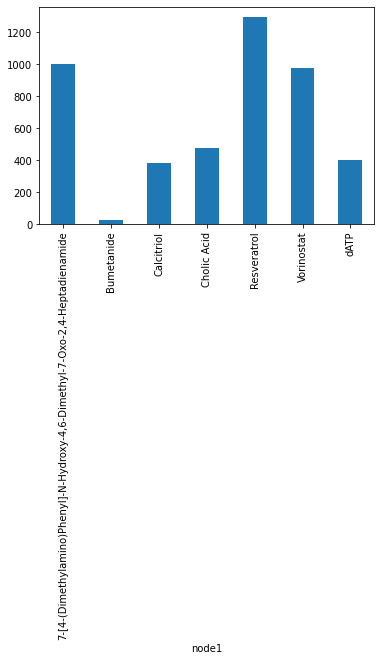

In [82]:
drugs_publications.groupby('node1')["node2"].count().plot.bar();

##### We could also check whether combinations of drugs among the shorted list have been previouly used (co-mentioned in the literature)

In [72]:
drug_combinations_query = selected_queries.loc['association_combination_drug_disease_publication', 'query'].format(",".join(reduced_drug_list),",".join(reduced_drug_list),",".join(reduced_drug_list))


In [73]:
selected_queries.loc['association_combination_drug_disease_publication', 'query']

'MATCH (drug:Drug)-[r:MENTIONED_IN_PUBLICATION]-(publication:Publication) WHERE (drug.id IN [{}]) WITH publication, count(r) AS r_count WHERE r_count>1 MATCH (drug:Drug)-[r:MENTIONED_IN_PUBLICATION]-(publication)-[:MENTIONED_IN_PUBLICATION]-(drug2:Drug) WHERE (drug.id IN [{}]) AND drug2.id IN [{}] AND drug.id<>drug2.id RETURN (drug.name +", "+drug2.name) AS node1, publication.id AS node2, publication.linkout AS linkout, publication.year as Year, type(r) AS type\n'

In [74]:
drugs_combinations = connector.getCursorData(driver=driver, query=drug_combinations_query, parameters={})

In [75]:
drugs_combinations.head()

node1     node2  \
0   Resveratrol, Vorinostat  30679503   
1   Vorinostat, Resveratrol  30679503   
2   Resveratrol, Vorinostat  30542671   
3   Vorinostat, Resveratrol  30542671   
4  Cholic Acid, Resveratrol  25871373   

                                        linkout    Year  \
0  https://www.ncbi.nlm.nih.gov/pubmed/30679503  2019.0   
1  https://www.ncbi.nlm.nih.gov/pubmed/30679503  2019.0   
2  https://www.ncbi.nlm.nih.gov/pubmed/30542671  2017.0   
3  https://www.ncbi.nlm.nih.gov/pubmed/30542671  2017.0   
4  https://www.ncbi.nlm.nih.gov/pubmed/25871373  2015.0   

                       type  
0  MENTIONED_IN_PUBLICATION  
1  MENTIONED_IN_PUBLICATION  
2  MENTIONED_IN_PUBLICATION  
3  MENTIONED_IN_PUBLICATION  
4  MENTIONED_IN_PUBLICATION

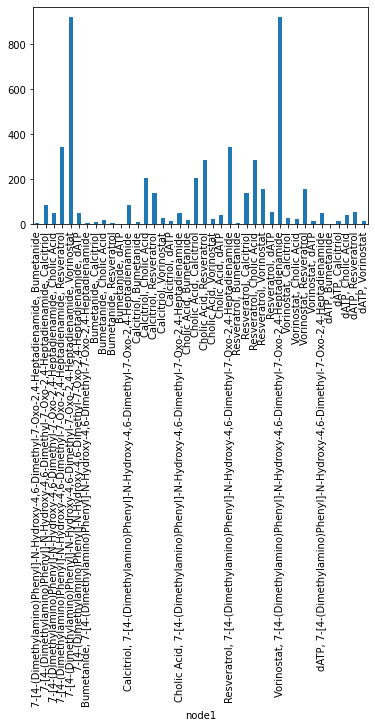

In [83]:
drugs_combinations.groupby('node1')["node2"].count().plot.bar();

##### Some of these combination therapies could be considered.

### 6) Proposed Drug Candidates: 

#### - Vorinostat (https://www.drugbank.ca/drugs/DB02546) 
![Vorinostat](https://www.drugbank.ca/structures/DB02546/image.svg)

#### - 7-[4-(Dimethylamino)Phenyl]-N-Hydroxy-4,6-Dimethyl-7-Oxo-2,4-Heptadienamide (https://www.drugbank.ca/drugs/DB04297)
![7-[4-(Dimethylamino)Phenyl]-N-Hydroxy-4,6-Dimethyl-7-Oxo-2,4-Heptadienamide"](https://www.drugbank.ca/structures/DB04297/image.svg)

In [91]:
import pandas as pd
drug_result = drugs_proposed[drugs_proposed['node2'].isin(['7-[4-(Dimethylamino)Phenyl]-N-Hydroxy-4,6-Dimethyl-7-Oxo-2,4-Heptadienamide','Vorinostat'])]
drug_result.columns = ["Protein","Drug_name","Drug_id","Drug_desc","Inhibition_score","Drug_interaction_type","Action","Drug_protein_source"]
drug_result['Side_effects'] = ";".join(side_effects[side_effects['node1']==drug_result["Drug_name"].tolist().pop()]['node2'].tolist())
drug_result['Publications'] = ";".join(drugs_publications[drugs_publications['node1']==drug_result['Drug_name'].tolist().pop()]['node2'].tolist())
protein_result = proteins_associated_lung_cancer[proteins_associated_lung_cancer['node1']==drug_result["Protein"].tolist().pop()]
protein_result.columns = ["Protein", "Disease", "Protein_disease_source", "Protein_disease_association_type", "Disease_score"]
result = pd.merge(drug_result, protein_result, on='Protein')
result = result[["Protein", "Disease", 
                 "Protein_disease_source", "Protein_disease_association_type", 
                 "Disease_score", "Drug_name", "Drug_id", "Drug_desc", "Action", "Drug_protein_source","Drug_interaction_type","Inhibition_score",
                 "Side_effects", "Publications"
                ]]

In [93]:
result

Protein      Disease  Protein_disease_source  \
0  HDAC1~Q13547  lung cancer                    1.58   
1  HDAC1~Q13547  lung cancer                    1.58   

  Protein_disease_association_type Disease_score  \
0                  ASSOCIATED_WITH      DISEASES   
1                  ASSOCIATED_WITH      DISEASES   

                                           Drug_name  Drug_id  \
0                                         Vorinostat  DB02546   
1  7-[4-(Dimethylamino)Phenyl]-N-Hydroxy-4,6-Dime...  DB04297   

                                           Drug_desc      Action  \
0  Vorinostat (rINN) or suberoylanilide hydroxami...  inhibition   
1                                               None  inhibition   

  Drug_protein_source Drug_interaction_type  Inhibition_score Side_effects  \
0              STITCH               ACTS_ON             0.987                
1              STITCH               ACTS_ON             0.938                

                                        Publications  
0  PMID:11158338;PMID:11691816;PMID:11283670;PMID...  
1  PMID:11158338;PMID:11691816;PMID:11283670;PMID...

In [94]:
regulation_result = regulation_table[regulation_table["identifier"]==drug_result["Protein"].tolist().pop()]
regulation_result

identifier  group1   group2  mean(group1)  std(group1)  mean(group2)  \
1885  HDAC1~Q13547  CANCER  CONTROL        30.666        0.301        27.292   

      std(group2)  effsize  log2FC         FC  ... dfk  dfn  T-statistics  \
1885        2.201    1.227   3.374  10.367528  ...   1    2     -1.008813   

        pvalue      padj  rejected  -log10 pvalue                  correction  \
1885  0.164871  0.036735      True       0.782856  permutation FDR (4.0 perm)   

                     Method s0  
1885  SAMR Two class paired  2  

[1 rows x 21 columns]

### References

- http://disease-ontology.org/
- http://stitch.embl.de/
- https://www.ncbi.nlm.nih.gov/pubmed/
- http://sideeffects.embl.de/
- https://www.drugbank.ca
- https://cytoscape.org/

- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6068348/
- https://neo4j.com/